In [ ]:
# %%

import torch
from util.gpu_info import gpuInfo
from util.data_augmentation import data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import test
from util.data_load import data_load

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *
from networks.DLinkNet152 import *

training_data_processing = False
model_training = True
model_validation = True
model_loading = False

batch_size = 4

path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/DLinkNet152.model"

cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")

gpu_info = gpuInfo()

model = DLinkNet152()
if cuda_available:
    model.cuda()

print(model)

Mon Jan 20 08:46:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   32C    P0             39W /  340W |     439MiB /  16376MiB |      4%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DLinkNet152(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256

In [ ]:
# %%

if training_data_processing:
    training_resize = 512
    training_number = 367
    testing_resize = int(608 * training_resize / 400)
    if testing_resize % 2 == 1:
        testing_resize += 1

    data_augmentation(
        training_resize,
        training_number,
        testing_resize,
    )

In [ ]:
# %%

if not model_loading:
    training_generator, validation_generator = data_load(
        path_data, model_validation, batch_size
    )


 Fim do Carregamento Training Data

 Fim do Carregamento Validation Data

 Fim do Carregamento


/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/20 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.3970964252948761
→ ACC for Batch 1: 0.9765872955322266
→ Recall for Batch 1: 0.00584471204716078
→ Running_loss for Batch 21: 0.3314076066017151
→ ACC for Batch 21: 0.9690885543823242
→ Recall for Batch 21: 0.0
→ Running_loss for Batch 41: 0.2991195023059845
→ ACC for Batch 41: 0.9604339599609375
→ Recall for Batch 41: 0.3124391478755306
→ Running_loss for Batch 61: 0.3093515932559967
→ ACC for Batch 61: 0.9711990356445312
→ Recall for Batch 61: 0.5214723926380368
→ Running_loss for Batch 81: 0.24862243235111237
→ ACC for Batch 81: 0.9622592926025391
→ Recall for Batch 81: 0.5523076923076923
→ Running_loss for Batch 101: 0.22880536317825317
→ ACC for Batch 101: 0.9743919372558594
→ Recall for Batch 101: 0.609387548707576
→ Running_loss for Batch 121: 0.20736488699913025
→ ACC for Batch 121: 0.9705333709716797
→ Recall for Batch 121: 0.6227266864439571
→ Running_loss for Batch 141: 0.2737312316894531
→ ACC f

  5%|▌         | 1/20 [10:54<3:27:15, 654.50s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.1858014464378357
→ ACC for Batch 1: 0.9767370223999023
→ Recall for Batch 1: 0.7339312020262063
→ Running_loss for Batch 21: 0.23137328028678894
→ ACC for Batch 21: 0.9795665740966797
→ Recall for Batch 21: 0.827005306269641
→ Running_loss for Batch 41: 0.18589845299720764
→ ACC for Batch 41: 0.9794292449951172
→ Recall for Batch 41: 0.7668864019622873
→ Running_loss for Batch 61: 0.18378400802612305
→ ACC for Batch 61: 0.9784135818481445
→ Recall for Batch 61: 0.7798591509138083
→ Running_loss for Batch 81: 0.17474882304668427
→ ACC for Batch 81: 0.964228630065918
→ Recall for Batch 81: 0.6793271839392295
→ Running_loss for Batch 101: 0.22934159636497498
→ ACC for Batch 101: 0.9873790740966797
→ Recall for Batch 101: 0.7195862867062057
→ Running_loss for Batch 121: 0.19851018488407135
→ ACC for Batch 121: 0.9875249862670898
→ Recall for Batch 121: 0.6356641017062563
→ Running_loss for Batch 141: 0.17902903

 10%|█         | 2/20 [20:23<3:01:13, 604.06s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.1786506325006485
→ ACC for Batch 1: 0.9924240112304688
→ Recall for Batch 1: 0.7118130679359584
→ Running_loss for Batch 21: 0.19575068354606628
→ ACC for Batch 21: 0.989720344543457
→ Recall for Batch 21: 0.8024805102763997
→ Running_loss for Batch 41: 0.14686726033687592
→ ACC for Batch 41: 0.9788284301757812
→ Recall for Batch 41: 0.7789416433334004
→ Running_loss for Batch 61: 0.1504611223936081
→ ACC for Batch 61: 0.9757156372070312
→ Recall for Batch 61: 0.800353916363975
→ Running_loss for Batch 81: 0.1993301659822464
→ ACC for Batch 81: 0.9862527847290039
→ Recall for Batch 81: 0.6652540442014127
→ Running_loss for Batch 101: 0.1487753838300705
→ ACC for Batch 101: 0.9786100387573242
→ Recall for Batch 101: 0.7446204132456515
→ Running_loss for Batch 121: 0.14984562993049622
→ ACC for Batch 121: 0.9900321960449219
→ Recall for Batch 121: 0.7400067750677507
→ Running_loss for Batch 141: 0.15358074009

 15%|█▌        | 3/20 [29:58<2:47:22, 590.75s/it]

Validation loss for Epoch 3: 0.17539533972740173

Acurácia de validação:  0.9837253604616437
F1-score de validação:  0.6968531669778409
IoU de validação:  0.9722241319402671
Recall de validação:  0.7406368122327308

---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.17135663330554962
→ ACC for Batch 1: 0.9834442138671875
→ Recall for Batch 1: 0.7612919830137691
→ Running_loss for Batch 21: 0.19214126467704773
→ ACC for Batch 21: 0.9770841598510742
→ Recall for Batch 21: 0.7663141875049199
→ Running_loss for Batch 41: 0.14051252603530884
→ ACC for Batch 41: 0.9831352233886719
→ Recall for Batch 41: 0.8153036895017575
→ Running_loss for Batch 61: 0.11854477971792221
→ ACC for Batch 61: 0.9895133972167969
→ Recall for Batch 61: 0.8184851414138264
→ Running_loss for Batch 81: 0.14810249209403992
→ ACC for Batch 81: 0.9794015884399414
→ Recall for Batch 81: 0.744065429882306
→ Running_loss for Batch 101: 0.13671140372753143
→ ACC for Batch 101: 0.9837312698364258

 20%|██        | 4/20 [40:54<2:44:28, 616.77s/it]


---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.1462678760290146
→ ACC for Batch 1: 0.9894695281982422
→ Recall for Batch 1: 0.7782893142718682
→ Running_loss for Batch 21: 0.1855352222919464
→ ACC for Batch 21: 0.9828472137451172
→ Recall for Batch 21: 0.6239990474205935
→ Running_loss for Batch 41: 0.21924692392349243
→ ACC for Batch 41: 0.9879522323608398
→ Recall for Batch 41: 0.6533698425539859
→ Running_loss for Batch 61: 0.10904062539339066
→ ACC for Batch 61: 0.9828596115112305
→ Recall for Batch 61: 0.8726262733823164
→ Running_loss for Batch 81: 0.10691935569047928
→ ACC for Batch 81: 0.991398811340332
→ Recall for Batch 81: 0.878486478833357
→ Running_loss for Batch 101: 0.12689077854156494
→ ACC for Batch 101: 0.9906549453735352
→ Recall for Batch 101: 0.8495861820798849
→ Running_loss for Batch 121: 0.12474740296602249
→ ACC for Batch 121: 0.9961872100830078
→ Recall for Batch 121: 0.7802836754470972
→ Running_loss for Batch 141: 0.132079973

 25%|██▌       | 5/20 [53:00<2:44:01, 656.09s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.14242807030677795
→ ACC for Batch 1: 0.9869041442871094
→ Recall for Batch 1: 0.7983715109463613
→ Running_loss for Batch 21: 0.15042001008987427
→ ACC for Batch 21: 0.9843387603759766
→ Recall for Batch 21: 0.7540507196710076
→ Running_loss for Batch 41: 0.1263287216424942
→ ACC for Batch 41: 0.9932069778442383
→ Recall for Batch 41: 0.7988627552339106
→ Running_loss for Batch 61: 0.111944280564785
→ ACC for Batch 61: 0.9870939254760742
→ Recall for Batch 61: 0.8142248305736044
→ Running_loss for Batch 81: 0.109799325466156
→ ACC for Batch 81: 0.9892387390136719
→ Recall for Batch 81: 0.8973841266070846
→ Running_loss for Batch 101: 0.1403186172246933
→ ACC for Batch 101: 0.9965715408325195
→ Recall for Batch 101: 0.8249596824215358
→ Running_loss for Batch 121: 0.16689355671405792
→ ACC for Batch 121: 0.9792327880859375
→ Recall for Batch 121: 0.706037272625823
→ Running_loss for Batch 141: 0.146945059299

 30%|███       | 6/20 [1:05:01<2:38:15, 678.21s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.15569531917572021
→ ACC for Batch 1: 0.9922323226928711
→ Recall for Batch 1: 0.7276499005399261
→ Running_loss for Batch 21: 0.09648843109607697
→ ACC for Batch 21: 0.9883003234863281
→ Recall for Batch 21: 0.8790567147965419
→ Running_loss for Batch 41: 0.10173393785953522
→ ACC for Batch 41: 0.9876508712768555
→ Recall for Batch 41: 0.838079579085827
→ Running_loss for Batch 61: 0.11275697499513626
→ ACC for Batch 61: 0.9905166625976562
→ Recall for Batch 61: 0.8129507882811005
→ Running_loss for Batch 81: 0.1414141207933426
→ ACC for Batch 81: 0.9821739196777344
→ Recall for Batch 81: 0.784974958263773
→ Running_loss for Batch 101: 0.10302640497684479
→ ACC for Batch 101: 0.9931020736694336
→ Recall for Batch 101: 0.8839063488715461
→ Running_loss for Batch 121: 0.1420188844203949
→ ACC for Batch 121: 0.9938259124755859
→ Recall for Batch 121: 0.7635857244640197
→ Running_loss for Batch 141: 0.099249698

 35%|███▌      | 7/20 [1:16:46<2:28:47, 686.73s/it]


---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.10836874693632126
→ ACC for Batch 1: 0.9928531646728516
→ Recall for Batch 1: 0.8528284402510425
→ Running_loss for Batch 21: 0.12944179773330688
→ ACC for Batch 21: 0.9961442947387695
→ Recall for Batch 21: 0.8093374069123545
→ Running_loss for Batch 41: 0.11816414445638657
→ ACC for Batch 41: 0.9924783706665039
→ Recall for Batch 41: 0.8549438609199566
→ Running_loss for Batch 61: 0.09828437119722366
→ ACC for Batch 61: 0.9859857559204102
→ Recall for Batch 61: 0.8766284848135997
→ Running_loss for Batch 81: 0.1483006775379181
→ ACC for Batch 81: 0.9940204620361328
→ Recall for Batch 81: 0.7852832965415747
→ Running_loss for Batch 101: 0.1369938999414444
→ ACC for Batch 101: 0.9775943756103516
→ Recall for Batch 101: 0.8725575546527374
→ Running_loss for Batch 121: 0.10064180940389633
→ ACC for Batch 121: 0.994776725769043
→ Recall for Batch 121: 0.8813842096765513
→ Running_loss for Batch 141: 0.08844950

 40%|████      | 8/20 [1:28:10<2:17:13, 686.16s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.11261937022209167
→ ACC for Batch 1: 0.9865055084228516
→ Recall for Batch 1: 0.8687002339153652
→ Running_loss for Batch 21: 0.10161374509334564
→ ACC for Batch 21: 0.9925765991210938
→ Recall for Batch 21: 0.8609808262354133
→ Running_loss for Batch 41: 0.10869544744491577
→ ACC for Batch 41: 0.9953193664550781
→ Recall for Batch 41: 0.8121883656509695
→ Running_loss for Batch 61: 0.11200343072414398
→ ACC for Batch 61: 0.9879264831542969
→ Recall for Batch 61: 0.8240177089097952
→ Running_loss for Batch 81: 0.08819607645273209
→ ACC for Batch 81: 0.9907960891723633
→ Recall for Batch 81: 0.8847106159083875
→ Running_loss for Batch 101: 0.10210055112838745
→ ACC for Batch 101: 0.9916963577270508
→ Recall for Batch 101: 0.8435987535636147
→ Running_loss for Batch 121: 0.10178877413272858
→ ACC for Batch 121: 0.9876785278320312
→ Recall for Batch 121: 0.8777945412151968
→ Running_loss for Batch 141: 0.10249

 45%|████▌     | 9/20 [1:39:55<2:06:49, 691.76s/it]


---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.09206180274486542
→ ACC for Batch 1: 0.9932518005371094
→ Recall for Batch 1: 0.8906039262700435
→ Running_loss for Batch 21: 0.165912926197052
→ ACC for Batch 21: 0.9916315078735352
→ Recall for Batch 21: 0.695073533523458
→ Running_loss for Batch 41: 0.10508950054645538
→ ACC for Batch 41: 0.9943399429321289
→ Recall for Batch 41: 0.8437089439110662
→ Running_loss for Batch 61: 0.0957370176911354
→ ACC for Batch 61: 0.993133544921875
→ Recall for Batch 61: 0.8554729805430034
→ Running_loss for Batch 81: 0.10523556172847748
→ ACC for Batch 81: 0.9793853759765625
→ Recall for Batch 81: 0.85716970494268
→ Running_loss for Batch 101: 0.08530233800411224
→ ACC for Batch 101: 0.9951362609863281
→ Recall for Batch 101: 0.8994189922849796
→ Running_loss for Batch 121: 0.12550027668476105
→ ACC for Batch 121: 0.9924335479736328
→ Recall for Batch 121: 0.8331979937903033
→ Running_loss for Batch 141: 0.13890101015

 50%|█████     | 10/20 [1:49:44<1:50:00, 660.08s/it]

Validation loss for Epoch 10: 0.1238274797797203

Acurácia de validação:  0.9879310522760664
F1-score de validação:  0.767255839655452
IoU de validação:  0.978608591400018
Recall de validação:  0.7880616510572123

---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.08521493524312973
→ ACC for Batch 1: 0.9899024963378906
→ Recall for Batch 1: 0.8812442571883194
→ Running_loss for Batch 21: 0.10026361048221588
→ ACC for Batch 21: 0.9930839538574219
→ Recall for Batch 21: 0.8784545967287084
→ Running_loss for Batch 41: 0.10031336545944214
→ ACC for Batch 41: 0.9967689514160156
→ Recall for Batch 41: 0.88595417176841
→ Running_loss for Batch 61: 0.08520115911960602
→ ACC for Batch 61: 0.9924774169921875
→ Recall for Batch 61: 0.8863402218047391
→ Running_loss for Batch 81: 0.11960725486278534
→ ACC for Batch 81: 0.9913825988769531
→ Recall for Batch 81: 0.8297498731806298
→ Running_loss for Batch 101: 0.07560025155544281
→ ACC for Batch 101: 0.9950494766235352
→

 55%|█████▌    | 11/20 [1:58:58<1:34:07, 627.56s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.13576970994472504
→ ACC for Batch 1: 0.9963083267211914
→ Recall for Batch 1: 0.7681188925081434
→ Running_loss for Batch 21: 0.07823210954666138
→ ACC for Batch 21: 0.9913558959960938
→ Recall for Batch 21: 0.9137738505607613
→ Running_loss for Batch 41: 0.08132857084274292
→ ACC for Batch 41: 0.9947757720947266
→ Recall for Batch 41: 0.904825962670254
→ Running_loss for Batch 61: 0.10164058208465576
→ ACC for Batch 61: 0.991063117980957
→ Recall for Batch 61: 0.8621948935638929
→ Running_loss for Batch 81: 0.08451807498931885
→ ACC for Batch 81: 0.9952974319458008
→ Recall for Batch 81: 0.8941256169553856
→ Running_loss for Batch 101: 0.11321988701820374
→ ACC for Batch 101: 0.986872673034668
→ Recall for Batch 101: 0.9017185023771791
→ Running_loss for Batch 121: 0.12837952375411987
→ ACC for Batch 121: 0.9960145950317383
→ Recall for Batch 121: 0.8229118275573725
→ Running_loss for Batch 141: 0.1106830

 60%|██████    | 12/20 [2:08:48<1:22:09, 616.22s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.10396244376897812
→ ACC for Batch 1: 0.9908409118652344
→ Recall for Batch 1: 0.8760909727973498
→ Running_loss for Batch 21: 0.10763316601514816
→ ACC for Batch 21: 0.9955301284790039
→ Recall for Batch 21: 0.8752736726874658
→ Running_loss for Batch 41: 0.09028813987970352
→ ACC for Batch 41: 0.9947309494018555
→ Recall for Batch 41: 0.8714886997895508
→ Running_loss for Batch 61: 0.08252489566802979
→ ACC for Batch 61: 0.9944343566894531
→ Recall for Batch 61: 0.9190511127415016
→ Running_loss for Batch 81: 0.09287441521883011
→ ACC for Batch 81: 0.9896564483642578
→ Recall for Batch 81: 0.8777796638940757
→ Running_loss for Batch 101: 0.11596525460481644
→ ACC for Batch 101: 0.9932155609130859
→ Recall for Batch 101: 0.829737802854298
→ Running_loss for Batch 121: 0.07605772465467453
→ ACC for Batch 121: 0.991847038269043
→ Recall for Batch 121: 0.9056019424692153
→ Running_loss for Batch 141: 0.088422

 65%|██████▌   | 13/20 [2:18:19<1:10:17, 602.46s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.11134568601846695
→ ACC for Batch 1: 0.9930944442749023
→ Recall for Batch 1: 0.8464724685966413
→ Running_loss for Batch 21: 0.08152753114700317
→ ACC for Batch 21: 0.9886264801025391
→ Recall for Batch 21: 0.8922907447152001
→ Running_loss for Batch 41: 0.07631146162748337
→ ACC for Batch 41: 0.9910097122192383
→ Recall for Batch 41: 0.8988191089640365
→ Running_loss for Batch 61: 0.10501301288604736
→ ACC for Batch 61: 0.9940862655639648
→ Recall for Batch 61: 0.8612428373839163
→ Running_loss for Batch 81: 0.08061103522777557
→ ACC for Batch 81: 0.9925804138183594
→ Recall for Batch 81: 0.8889911952580998
→ Running_loss for Batch 101: 0.08239720016717911
→ ACC for Batch 101: 0.99652099609375
→ Recall for Batch 101: 0.8662322493391529
→ Running_loss for Batch 121: 0.10538998246192932
→ ACC for Batch 121: 0.9946928024291992
→ Recall for Batch 121: 0.8739505205418112
→ Running_loss for Batch 141: 0.098739

 70%|███████   | 14/20 [2:28:28<1:00:26, 604.48s/it]

Validation loss for Epoch 14: 0.11215917766094208

Acurácia de validação:  0.9889851845040614
F1-score de validação:  0.7872850211481651
IoU de validação:  0.9803327901838912
Recall de validação:  0.8088750985780941

---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.1044444888830185
→ ACC for Batch 1: 0.9916601181030273
→ Recall for Batch 1: 0.8477889995905554
→ Running_loss for Batch 21: 0.09332696348428726
→ ACC for Batch 21: 0.9903678894042969
→ Recall for Batch 21: 0.8780539063731414
→ Running_loss for Batch 41: 0.0963059589266777
→ ACC for Batch 41: 0.9934024810791016
→ Recall for Batch 41: 0.8731619844590556
→ Running_loss for Batch 61: 0.1046610176563263
→ ACC for Batch 61: 0.9885063171386719
→ Recall for Batch 61: 0.8520153788912316
→ Running_loss for Batch 81: 0.08241964131593704
→ ACC for Batch 81: 0.9924860000610352
→ Recall for Batch 81: 0.9017568808698486
→ Running_loss for Batch 101: 0.11124607175588608
→ ACC for Batch 101: 0.986720085144043


 75%|███████▌  | 15/20 [2:40:02<52:37, 631.45s/it]  


---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.0965137705206871
→ ACC for Batch 1: 0.9968624114990234
→ Recall for Batch 1: 0.8552642461334877
→ Running_loss for Batch 21: 0.08775497227907181
→ ACC for Batch 21: 0.9912033081054688
→ Recall for Batch 21: 0.8949018759798887
→ Running_loss for Batch 41: 0.10480272769927979
→ ACC for Batch 41: 0.9867496490478516
→ Recall for Batch 41: 0.8743550834597875
→ Running_loss for Batch 61: 0.07406481355428696
→ ACC for Batch 61: 0.9921703338623047
→ Recall for Batch 61: 0.9190992493744787
→ Running_loss for Batch 81: 0.0977678894996643
→ ACC for Batch 81: 0.9942951202392578
→ Recall for Batch 81: 0.8917304821075952
→ Running_loss for Batch 101: 0.08198622614145279
→ ACC for Batch 101: 0.9905357360839844
→ Recall for Batch 101: 0.9048075126144646
→ Running_loss for Batch 121: 0.06888981908559799
→ ACC for Batch 121: 0.9885778427124023
→ Recall for Batch 121: 0.9191922389099023
→ Running_loss for Batch 141: 0.092659

 80%|████████  | 16/20 [2:51:47<43:34, 653.58s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.115558922290802
→ ACC for Batch 1: 0.9894618988037109
→ Recall for Batch 1: 0.8470949892407009
→ Running_loss for Batch 21: 0.08771996200084686
→ ACC for Batch 21: 0.9939947128295898
→ Recall for Batch 21: 0.8849724626278521
→ Running_loss for Batch 41: 0.07498583197593689
→ ACC for Batch 41: 0.9918594360351562
→ Recall for Batch 41: 0.9092689135276697
→ Running_loss for Batch 61: 0.08680061995983124
→ ACC for Batch 61: 0.9916810989379883
→ Recall for Batch 61: 0.9017577791683259
→ Running_loss for Batch 81: 0.08082279562950134
→ ACC for Batch 81: 0.9907951354980469
→ Recall for Batch 81: 0.858858183617026
→ Running_loss for Batch 101: 0.09489705413579941
→ ACC for Batch 101: 0.9968585968017578
→ Recall for Batch 101: 0.885489802741558
→ Running_loss for Batch 121: 0.07114879041910172
→ ACC for Batch 121: 0.9944391250610352
→ Recall for Batch 121: 0.8902938263453285
→ Running_loss for Batch 141: 0.07354939

 85%|████████▌ | 17/20 [3:03:41<33:35, 671.91s/it]


---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.06630121916532516
→ ACC for Batch 1: 0.9949378967285156
→ Recall for Batch 1: 0.9171062034232824
→ Running_loss for Batch 21: 0.09490393102169037
→ ACC for Batch 21: 0.9951820373535156
→ Recall for Batch 21: 0.8908961124533274
→ Running_loss for Batch 41: 0.08061938732862473
→ ACC for Batch 41: 0.9898719787597656
→ Recall for Batch 41: 0.9182366968141099
→ Running_loss for Batch 61: 0.08829256892204285
→ ACC for Batch 61: 0.9864425659179688
→ Recall for Batch 61: 0.8894053811194249
→ Running_loss for Batch 81: 0.07012239098548889
→ ACC for Batch 81: 0.9951763153076172
→ Recall for Batch 81: 0.9223728420808712
→ Running_loss for Batch 101: 0.06304383277893066
→ ACC for Batch 101: 0.9931917190551758
→ Recall for Batch 101: 0.9169479757715052
→ Running_loss for Batch 121: 0.07761694490909576
→ ACC for Batch 121: 0.9959135055541992
→ Recall for Batch 121: 0.9121956199908112
→ Running_loss for Batch 141: 0.0711

 90%|█████████ | 18/20 [3:15:24<22:42, 681.14s/it]


---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.08994699269533157
→ ACC for Batch 1: 0.9916257858276367
→ Recall for Batch 1: 0.8660597439544808
→ Running_loss for Batch 21: 0.08423606306314468
→ ACC for Batch 21: 0.9924287796020508
→ Recall for Batch 21: 0.908108598928539
→ Running_loss for Batch 41: 0.06379041075706482
→ ACC for Batch 41: 0.9959287643432617
→ Recall for Batch 41: 0.915719850673592
→ Running_loss for Batch 61: 0.0706210508942604
→ ACC for Batch 61: 0.9927549362182617
→ Recall for Batch 61: 0.9143004115226337
→ Running_loss for Batch 81: 0.0765024796128273
→ ACC for Batch 81: 0.9920854568481445
→ Recall for Batch 81: 0.9001686426819296
→ Running_loss for Batch 101: 0.09044456481933594
→ ACC for Batch 101: 0.9912109375
→ Recall for Batch 101: 0.8981267279805902
→ Running_loss for Batch 121: 0.08140638470649719
→ ACC for Batch 121: 0.9892091751098633
→ Recall for Batch 121: 0.8939729691960632
→ Running_loss for Batch 141: 0.08026045560836

 95%|█████████▌| 19/20 [3:26:23<11:14, 674.51s/it]

Validation loss for Epoch 19: 0.101437047123909

Acurácia de validação:  0.9898902186773774
F1-score de validação:  0.8039230218534704
IoU de validação:  0.9818128761057545
Recall de validação:  0.8231219128662578

---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.09360945969820023
→ ACC for Batch 1: 0.9935083389282227
→ Recall for Batch 1: 0.8544052527103374
→ Running_loss for Batch 21: 0.12523025274276733
→ ACC for Batch 21: 0.9914121627807617
→ Recall for Batch 21: 0.8655411255411255
→ Running_loss for Batch 41: 0.05448746681213379
→ ACC for Batch 41: 0.994175910949707
→ Recall for Batch 41: 0.9281414328883812
→ Running_loss for Batch 61: 0.0884997770190239
→ ACC for Batch 61: 0.9933204650878906
→ Recall for Batch 61: 0.8959788627890984
→ Running_loss for Batch 81: 0.07801323384046555
→ ACC for Batch 81: 0.9951505661010742
→ Recall for Batch 81: 0.9026328222308122
→ Running_loss for Batch 101: 0.10602053999900818
→ ACC for Batch 101: 0.9981012344360352


100%|██████████| 20/20 [3:36:41<00:00, 650.06s/it]

Validation loss for Epoch 20: 0.10152671486139297

Acurácia de validação:  0.9900275383676801
F1-score de validação:  0.8064781425593837
IoU de validação:  0.9820393896474081
Recall de validação:  0.8256001455222662



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0922474].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


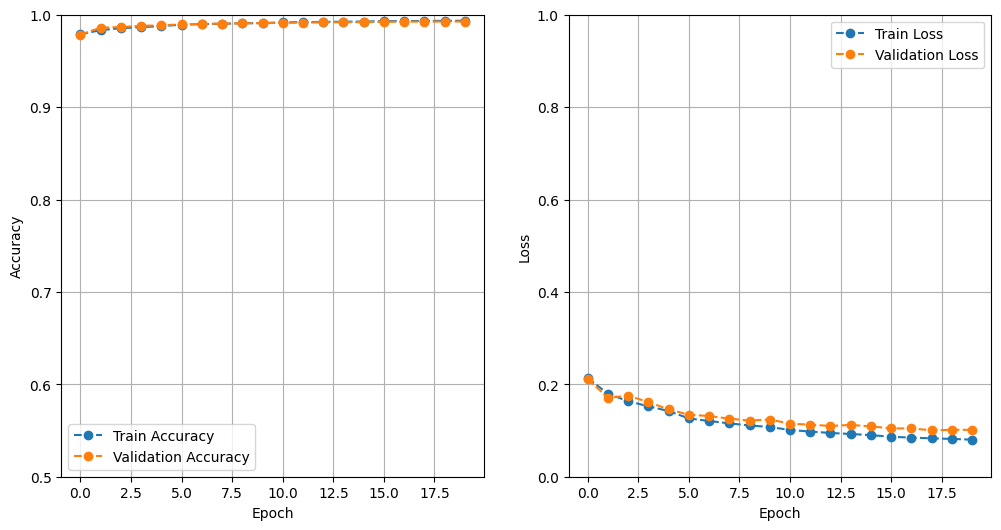

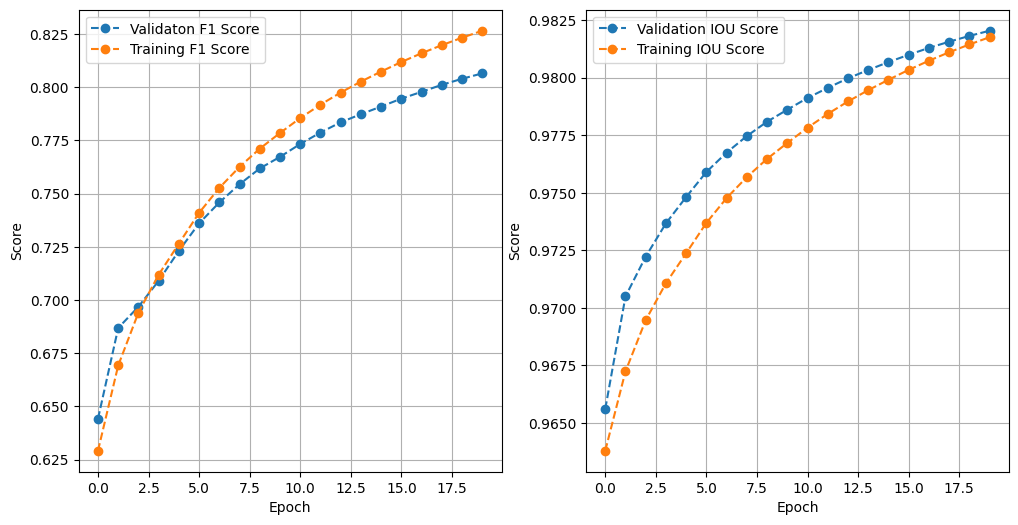

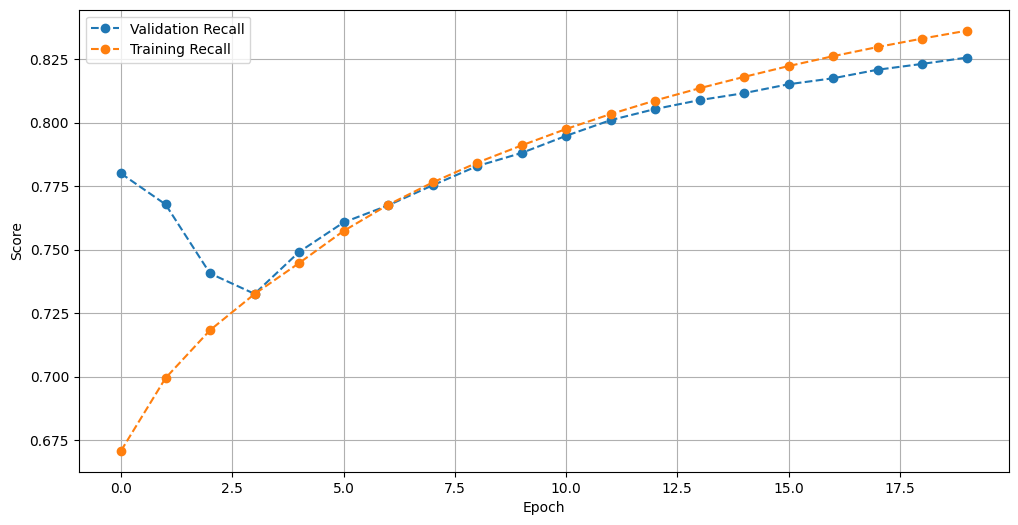

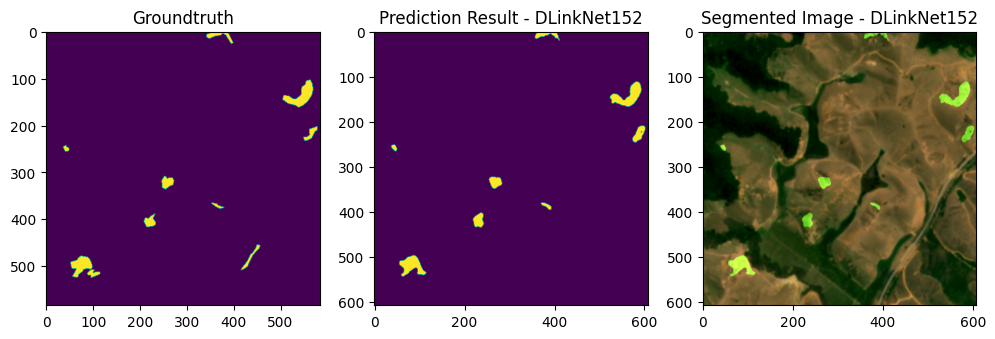

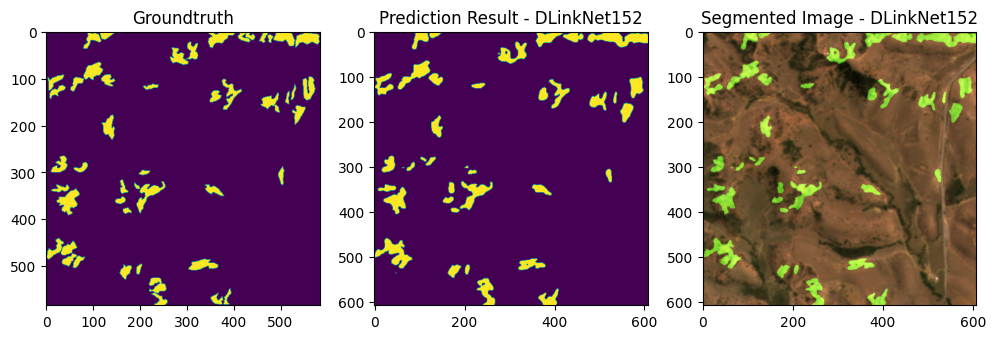

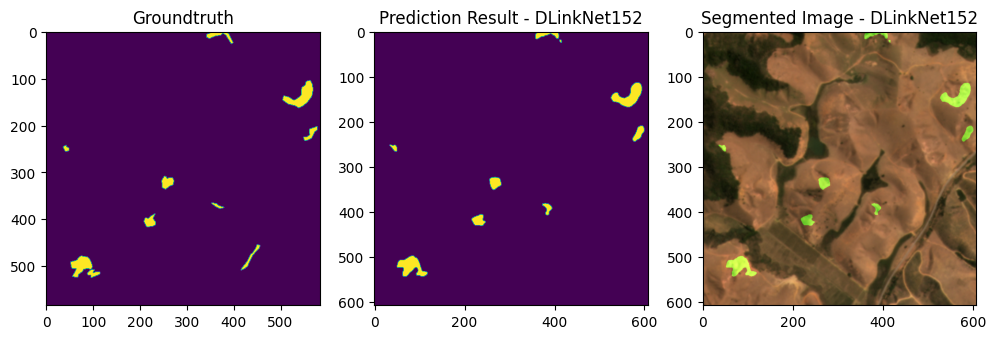

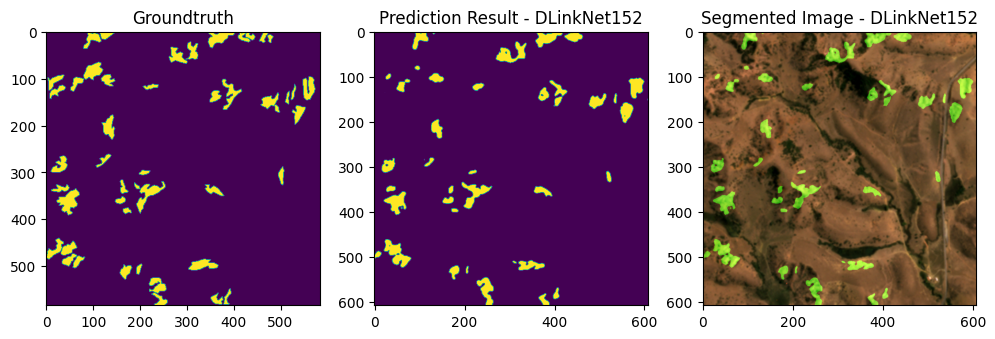

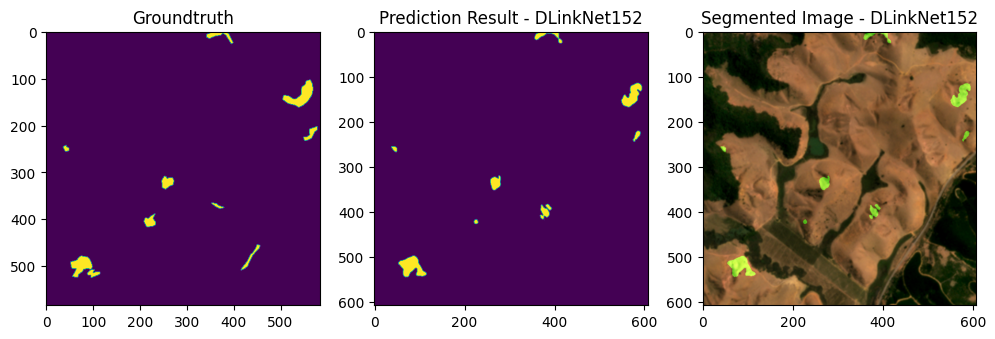

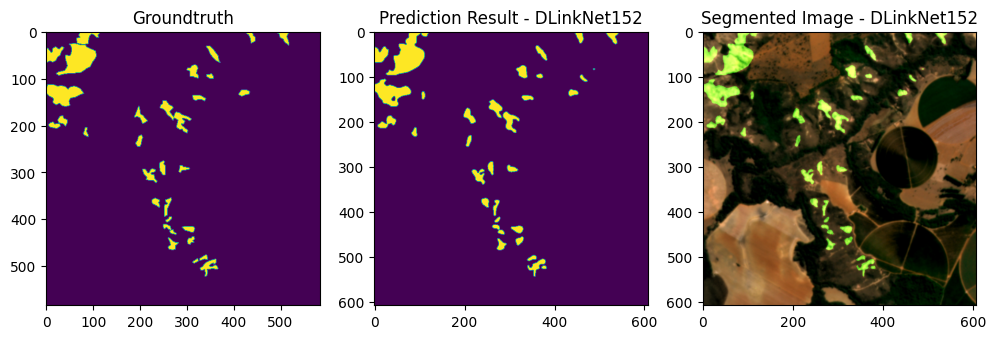

In [ ]:
# %%

if model_loading:
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

if model_training:
    train(
        model,
        training_generator,
        validation_generator,
        loss_func=BCEIoULoss(),
        learning_rate=2e-4,
        epochs=20,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=3,
    )

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)